In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For a single file data, we have:

In [ ]:
c108 = pd.read_table("https://raw.githubusercontent.com/ghinanto/LAB2-unibo-2023-2024/main/Calibrazione_108_R3.txt", sep=' ', names=['A', 'x_data', 'y_data', 'D', 'E', 'F'])
c108

,A,x_data,y_data,D,E,F
0,_,0,0.031,00f,00f,00f
1,_,1,0.159,00f,00f,00f
2,_,2,0.271,00f,00f,00f
3,_,3,0.495,00f,00f,00f
4,_,4,0.719,00f,00f,00f
...,...,...,...,...,...,...
1376,_,1376,251.573,00f,00f,010
1377,_,1377,251.686,00f,00f,00f
1378,_,1378,251.798,00f,00f,00f
1379,_,1379,251.910,00f,00f,010


(-69.0, 1449.0)

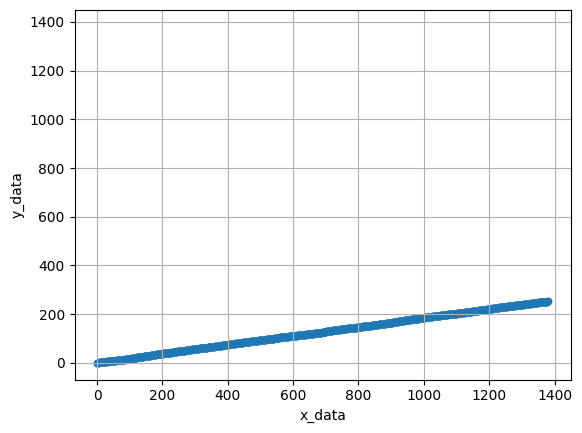

In [ ]:
c108.plot('x_data', 'y_data', kind="scatter", grid="yes")
ax = plt.gca()
plt.ylim(ax.get_xlim()[0], ax.get_xlim()[1])

In [ ]:
y_data = c108['y_data'].to_numpy()
x_data = c108['x_data'].to_numpy()

In [ ]:
m,b = np.polyfit(x_data, y_data, 1)
print("m = ", m)
print("b = ", b)

m =  0.1836538894998973
b =  0.20721523131269126


# To process all the files at once:

In [ ]:
data_files = ["https://raw.githubusercontent.com/ghinanto/LAB2-unibo-2023-2024/main/Calibrazione_108_R3.txt", "https://raw.githubusercontent.com/ghinanto/LAB2-unibo-2023-2024/main/Calibrazione_519_R3.txt", "https://raw.githubusercontent.com/ghinanto/LAB2-unibo-2023-2024/main/Calibrazione_2200_R3.txt", "https://raw.githubusercontent.com/ghinanto/LAB2-unibo-2023-2024/main/Calibrazione_5010_R3.txt", "https://raw.githubusercontent.com/ghinanto/LAB2-unibo-2023-2024/main/Calibrazione_10000_R3.txt"]


 Calibrazione_108_R3.txt  results:
m =  0.1836538894998973
b =  0.20721523131269126

 Calibrazione_519_R3.txt  results:
m =  0.18200816701357897
b =  3.840498450967109

 Calibrazione_2200_R3.txt  results:
m =  0.1829061562377931
b =  -0.4650100272594681

 Calibrazione_5010_R3.txt  results:
m =  0.1812622404860713
b =  -0.49656666719595915

 Calibrazione_10000_R3.txt  results:
m =  0.178736093076465
b =  -1.106515564854908


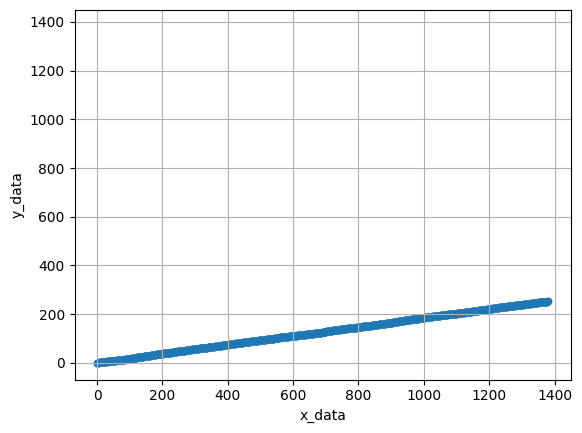

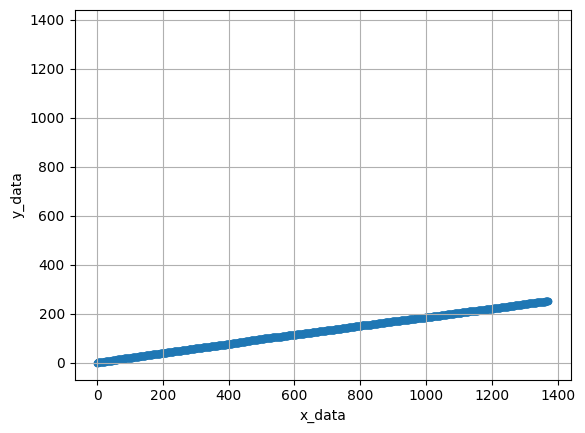

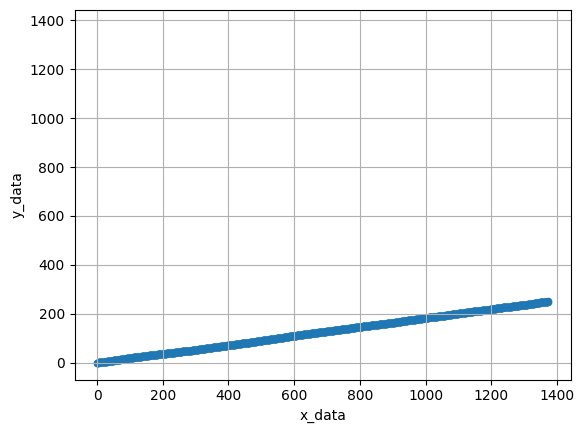

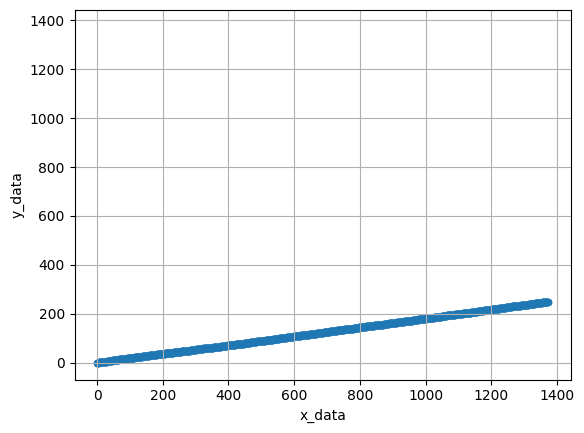

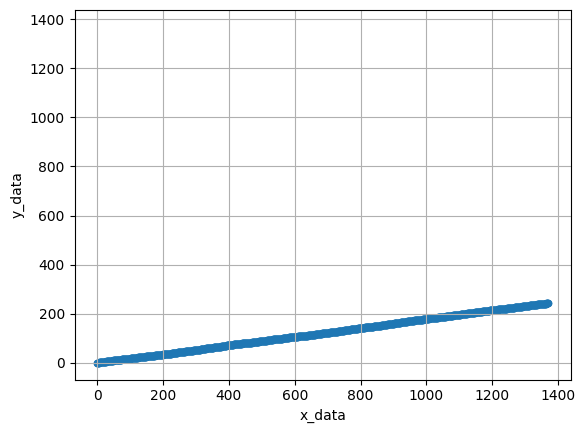

In [ ]:
for file_name in data_files:
  data_file = pd.read_table(file_name, sep=' ', names=['A', 'x_data', 'y_data', 'D', 'E', 'F'])
  data_file.plot('x_data', 'y_data', kind="scatter", grid="yes")
  ax = plt.gca()
  plt.ylim(ax.get_xlim()[0], ax.get_xlim()[1])
  m,b = np.polyfit(data_file['x_data'].to_numpy(), data_file['y_data'].to_numpy(), 1)
  print('\n', os.path.basename(file_name), " results:")
  print("m = ", m)
  print("b = ", b)

In [ ]:
data_7may = pd.read_table("https://raw.githubusercontent.com/ghinanto/LAB2-unibo-2023-2024/main/Acquisizione_02_05_R3.txt", sep=' ', names=['A', 'x_data', 'y_data', 'D', 'E', 'F'])
data_7may

,A,x_data,y_data,D,E,F
0,_,0,0.047,fff,fff,fff
1,_,1,0.159,fff,fff,fff
2,_,2,0.415,fff,fff,fff
3,_,3,0.623,fff,fff,fff
4,_,4,1.167,fff,fff,fff
...,...,...,...,...,...,...
721735,_,721735,427174.317,fff,fff,fff
721736,_,721736,427174.637,fff,fff,fff
721737,_,721737,427174.989,fff,fff,fff
721738,_,721738,427175.150,fff,fff,fff


(-36086.950000000004, 757825.95)

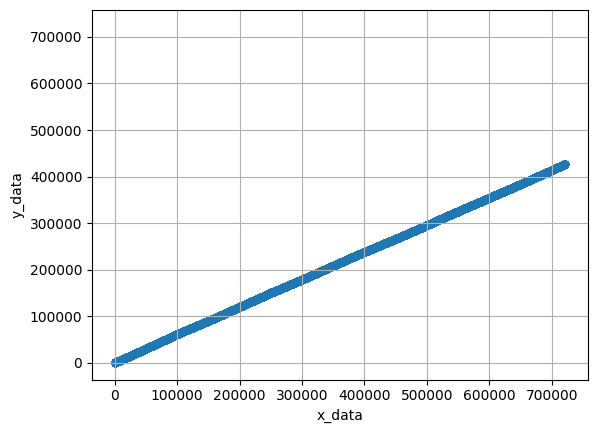

In [ ]:
data_7may.plot('x_data', 'y_data', kind="scatter", grid="yes")
ax = plt.gca()
plt.ylim(ax.get_xlim()[0], ax.get_xlim()[1])

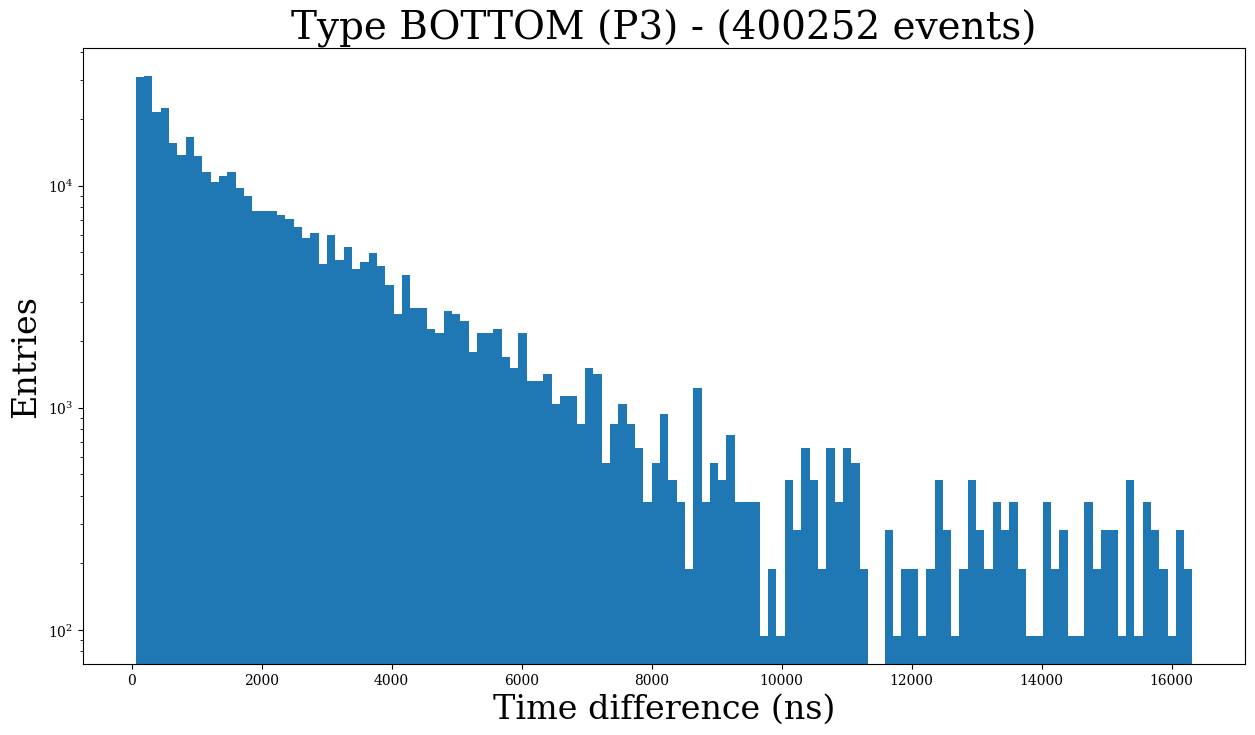

In [ ]:
import sys
datafiles="https://raw.githubusercontent.com/ghinanto/LAB2-unibo-2023-2024/main/Acquisizione_02_05_R3.txt"

import csv, numpy
import matplotlib.pyplot as plt

plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (15,8)


# (fake) tdc calibrations, so that time = tdc_value*slope_tdc + offset_tdc
slope_tdc=4.000			# tdc bin size, ns
offset_tdc=64			# tdc time offset, ns

# Read the files, append to list only if at least one plane has a valid TDC stop
data=[]
for filen in datafiles:
    #with open(filen, newline='') as f:
        #reader = csv.reader(f, delimiter=' ')
        reader = pd.read_table("https://raw.githubusercontent.com/ghinanto/LAB2-unibo-2023-2024/main/Acquisizione_02_05_R3.txt", sep=' ', names=['A', 'x_data', 'y_data', 'D', 'E', 'F']).to_numpy()
        for row in reader:
            row=row[1:]      #skip the '_'
            p=[int(row[j],16) for j in [2,3,4]]    # I don't care about event# and time here
            if any((item!=4095) for item in p):    # I don't care about empty events here
                data.append(p)
# now data contains the three planes stop values only for non-empty events

# Select data - here only events with P3 TDC stop and nothing else
p3=[]
for ev in data:
    if ev[0]==4095 and ev[1]==4095:
        p3.append(ev[2]*slope_tdc+offset_tdc)

# Plot it and format
fig, axs = plt.subplots()
y3,x3,h3=axs.hist(x=p3, color='tab:blue',bins=numpy.arange(offset_tdc,4095*slope_tdc+offset_tdc,32*slope_tdc))
axs.set_yscale('log')
axs.title.set_fontsize(28)
axs.title.set_text('Type BOTTOM (P3) - ('+str(len(p3))+' events)')
axs.set_ylabel('Entries',fontsize=24)
axs.set_xlabel('Time difference (ns)',fontsize=24)
plt.show()